This notebook is used to experiment

TODO:
-accuracy parameter, precision,..
-explain the effect of the parameters. 


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("../code")
from cad_tests import *
import matplotlib.pyplot as plt


### *Task 4*:

1. Select values for the learning rate, batch size and number of iterations similar to those used in Task 4. Analyze and compare the resulting loss curves with the loss curves obtained from the logistic regression. What do you observe? Also, report the accuracy of the methods you compare. Is there a best one?
2. Now, with a fixed set of hyper parameters, try to change the size of the hidden layer and report the obtained loss curves. How do the number of parameters of the model influence the loss curve? Can you think of an appropriate number of parameters for this dataset?

 `learning_rate`, `batchsize` and `in_features`, `n_hidden_features`, `out_features`

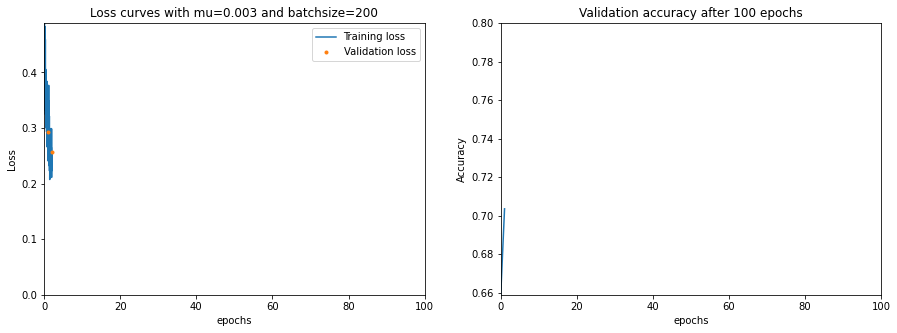

KeyboardInterrupt: 

In [25]:
number_of_plots=3
learning_rate =[0.003]
batchsize = [200, 500, 1000]
for i in range(1):
    for j in range(number_of_plots):
        i_learning_rate = learning_rate[i]
        j_batchsize = batchsize[j]
        n_hidden_features = 1000
        training_plot_N = f"training_plot_bs_{j_batchsize}_mu_{i_learning_rate}_expdecay"
        test_hist = f"test_hist_batchsize__bs_{j_batchsize}_mu_{i_learning_rate}_expdecay"
        t = Training(i_learning_rate,j_batchsize,n_hidden_features,training_plot_N,test_hist)
        t.data_preprocessing()
        t.define_shapes()
        t.launch_training()
        t.pass_on_test_set()


In [ ]:
t.pass_on_test_set()

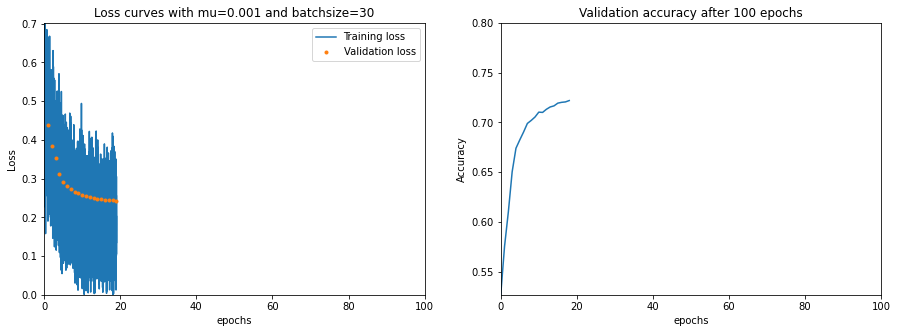

KeyboardInterrupt: 

In [29]:
for i in [1400]:
    i_learning_rate = 0.001
    j_batchsize = 30
    n_hidden_features = i
    training_plot_N = f"hf_{i}_training_plot_bs_{j_batchsize}_mu_{i_learning_rate}_expdecay"
    test_hist = f"test_hist_batchsize__bs_{j_batchsize}_mu_{i_learning_rate}_expdecay"
    t = Training(i_learning_rate,j_batchsize,n_hidden_features,training_plot_N,test_hist)
    t.data_preprocessing()
    t.define_shapes()
    t.launch_training()
    #t.pass_on_test_set()